# Tabulación y Gráficas de los Tiempos de Rendmiento de Multiplicación de Matrices Cuadradas.

El siguiente código tiene las funciones para realizar la tabulación, procesamiento y generar gráficas de rendmiento de los experimentos realizados.

In [1]:
import pandas as pd
import numpy as np
from os import listdir, path
import matplotlib.pyplot as plt

# Read data

In [ ]:
# !unrar x '/content/Experimentos_Col.rar'
# !unrar x '/content/Experimentos_FilaXFila.rar'

## Soluciones CPU

In [205]:
# path_data = '/content/Experimentos_Col/Soluciones4CPU/'
path_data = '/content/Experimentos_FilaXFila/Soluciones8CPU2/'

In [206]:
def extract_data(base, variable, posi):
  '''
  Función para extraer información de las salidas del experimento en cada replica.

  base: DataFrame
  variable: Nombre de la variable a crear
  posi: posición en la lista de la columna 'data', 0 = core; 1=  microseg

  Return: base con variable extraida de la variable data.
  '''

  base[variable] = base['data'].map(lambda x: x.split(':') )
  base[variable]  = base[variable].map( lambda x: x[posi].lstrip() if len(x)==2 else np.nan)
  base.dropna(inplace=True)

  return base

In [207]:
## Extraer data
base_MP = pd.DataFrame()

for name_file in listdir( path_data ):
  print(name_file)
  with open(path_data + name_file ) as open_file:
    file = open_file.read()

  base_i = pd.DataFrame(file.split('\n'))
  base_i.columns = ['data']

  #dim de la matriz
  base_i['combinacion'] = path.basename(name_file)
  base_i['size_matrix'] = path.basename(name_file).split('-')[1][4:]
  base_i['cores'] = path.basename(name_file).split('-')[2][-1:]

  # extraer data de core y microseg
  base_i = extract_data(base_i, 'id_core', 0)
  base_i = extract_data(base_i, 'microseg', 1)

  open_file.close()

  # concat data
  base_MP = pd.concat( [base_i,
                        base_MP],
                       axis=0)

base_MP['microseg'] = base_MP['microseg'].astype(int)

MM1c-Size200-core8
MM1c-Size400-core3
MM1c-Size100-core6
MM1c-Size200-core3
MM1c-Size800-core2
MM1c-Size400-core6
MM1c-Size400-core5
MM1c-Size400-core2
MM1c-Size100-core7
MM1c-Size400-core4
MM1c-Size800-core6
MM1c-Size600-core8
MM1c-Size400-core8
MM1c-Size800-core7
MM1c-Size600-core6
MM1c-Size200-core7
MM1c-Size600-core2
MM1c-Size600-core1
MM1c-Size100-core8
MM1c-Size100-core2
MM1c-Size100-core1
MM1c-Size200-core5
MM1c-Size600-core3
MM1c-Size200-core4
MM1c-Size200-core1
MM1c-Size800-core1
MM1c-Size100-core4
MM1c-Size200-core2
MM1c-Size400-core7
MM1c-Size600-core5
MM1c-Size800-core5
MM1c-Size600-core4
MM1c-Size400-core1
MM1c-Size200-core6
MM1c-Size600-core7
MM1c-Size800-core8
MM1c-Size800-core3
MM1c-Size100-core5
MM1c-Size800-core4
MM1c-Size100-core3


In [208]:
base_MP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         5400 non-null   object
 1   combinacion  5400 non-null   object
 2   size_matrix  5400 non-null   object
 3   cores        5400 non-null   object
 4   id_core      5400 non-null   object
 5   microseg     5400 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 295.3+ KB


In [209]:
len(sorted(base_MP['combinacion'].unique()))

40

In [210]:
base_MP.shape

(5400, 6)

In [211]:
base_MP['cores'].unique()

array(['3', '4', '5', '8', '7', '6', '1', '2'], dtype=object)

In [212]:
base_MP[  base_MP['combinacion'].str.contains('MM1c-Size100-core') ]['combinacion'].unique()

array(['MM1c-Size100-core3', 'MM1c-Size100-core5', 'MM1c-Size100-core4',
       'MM1c-Size100-core1', 'MM1c-Size100-core2', 'MM1c-Size100-core8',
       'MM1c-Size100-core7', 'MM1c-Size100-core6'], dtype=object)

In [213]:
base_MP[  base_MP['combinacion'].str.contains('MM1c-Size400-core8') ].shape

(240, 6)

In [214]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [215]:
## exportar
# base_MP.groupby(['size_matrix','cores'])['microseg'].mean().reset_index().sort_values(by=['size_matrix',
#                                                                                           'cores'], ascending=True).to_excel('tabla_tiempos promedio_MP.xlsx')

In [216]:
base_MP_groupby  =base_MP.groupby(['size_matrix',
                                   'cores'])['microseg'].mean().reset_index().sort_values(by=['size_matrix',
                                                                                              'cores'],
                                                                                          ascending=True)
base_MP_groupby.columns = ['dimension_matriz', 'cores', 'Promedio_microseg']

base_MP_groupby.head(20)

,dimension_matriz,cores,Promedio_microseg
0,100,1,1216.8333
1,100,2,685.6333
2,100,3,487.6000
3,100,4,376.4417
4,100,5,347.2400
5,100,6,289.5778
6,100,7,312.7095
7,100,8,1085.3083
8,200,1,13691.1333
9,200,2,5607.0500


In [217]:
base_MP_groupby['dimension_matriz'] = base_MP_groupby['dimension_matriz'].astype(str)
base_MP_groupby['cores'] = base_MP_groupby['cores'].astype(int)
base_MP_groupby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dimension_matriz   40 non-null     object 
 1   cores              40 non-null     int64  
 2   Promedio_microseg  40 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [218]:
### construir Spped_up absoluto  tiempo con 1 core/ tiempo con n

for size in  base_MP_groupby['dimension_matriz'].unique().tolist():
  time_1 = base_MP_groupby.loc[(base_MP_groupby['dimension_matriz'] ==size)  & (base_MP_groupby['cores'] ==1),'Promedio_microseg'].values
  print(size)

  for core_i in base_MP_groupby['cores'].unique().tolist():
    base_MP_groupby.loc[(base_MP_groupby['dimension_matriz'] ==size) &
                         (base_MP_groupby['cores'] ==core_i),
                                                          'time_core1'] = time_1

base_MP_groupby['Speed_Up_Abs'] = base_MP_groupby['time_core1']/base_MP_groupby['Promedio_microseg']

base_MP_groupby.head(15)

100
200
400
600
800


,dimension_matriz,cores,Promedio_microseg,time_core1,Speed_Up_Abs
0,100,1,1216.8333,1216.8333,1.0000
1,100,2,685.6333,1216.8333,1.7748
2,100,3,487.6000,1216.8333,2.4956
3,100,4,376.4417,1216.8333,3.2325
4,100,5,347.2400,1216.8333,3.5043
5,100,6,289.5778,1216.8333,4.2021
6,100,7,312.7095,1216.8333,3.8913
7,100,8,1085.3083,1216.8333,1.1212
8,200,1,13691.1333,13691.1333,1.0000
9,200,2,5607.0500,13691.1333,2.4418


In [219]:
lista_microseg_size = [ base_MP_groupby[base_MP_groupby['dimension_matriz'] ==size]['Speed_Up_Abs'].tolist() for size in  base_MP_groupby['dimension_matriz'].unique().tolist() ]
len(lista_microseg_size)

5

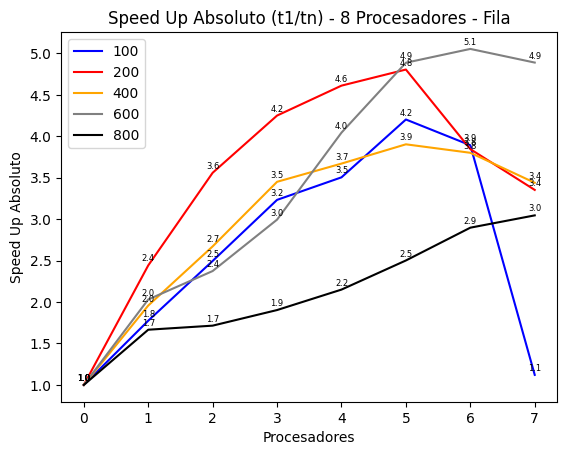

In [222]:
import matplotlib.pyplot as plt

def traza_curvas(series, colores, nombres):
    ''' Traza varias curvas a partir de varias series de puntos

    Además de la serie de puntos, se toma como entrada una serie de
    etiquetas y una serie de colores. Se debe comprobar que las tres
    series tienen el mismo número de elementos.
    Puede ser de utilidad la función 'built-in' zip
    '''
    if len(series) != len(colores) or len(series) != len(nombres):
        raise ValueError("Las tres series deben tener el mismo tamaño")
    for serie, color, nombre in zip(series, colores, nombres):
        plt.plot(serie, label=nombre, color=color)

        # Añadir etiquetas a cada punto de la serie
        for i, txt in enumerate(serie):
            plt.annotate(round(txt,1), (i, txt),
                         textcoords="offset points",
                         xytext=(0, 3), ha='center', fontsize=6)

    plt.legend()
    plt.xlabel('Procesadores')
    plt.ylabel('Speed Up Absoluto')
    # plt.ylim(0.1, 4.5)
    plt.title('Speed Up Absoluto (t1/tn) - 8 Procesadores - Fila')
    plt.show()

# Test de la función traza_curvas
colores = ['blue', 'red', 'orange', 'grey','black']
nombres = base_MP_groupby['dimension_matriz'].unique().tolist()

traza_curvas(lista_microseg_size, colores, nombres)

# Exportar

In [221]:
# base_MP.to_excel('Tabulación_tempos_procesadores_8CPU_Col.xlsx')